In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

files = glob.glob("./test_data/*")
ave_n = 3
for file in files:
    TH = 1.3
    df = pd.read_csv(file)
    df_tmp = df[["Acc_X[G]","Acc_Y[G]","Acc_Z[G]"]]
    ave_x = abs(sum(list(df["Acc_X[G]"])[:ave_n])/ave_n)
    ave_y = abs(sum(list(df["Acc_Y[G]"])[:ave_n])/ave_n)
    ave_z = abs(sum(list(df["Acc_Z[G]"])[:ave_n])/ave_n)
    tmp = []
    
    if file[-24:-22] == "D9":
        TH = 1.05
    elif file[-24:-22] == "E6":
        TH = 1.1
    elif file[-24:-22] == "DC":
        TH = 1.1
        
    for data in df_tmp.itertuples():
        x = data[1]
        y = data[2]
        z = data[3]
        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
            tmp.append(1)
        else:
            tmp.append(0)
    df_tmp[4] = tmp
    #print(file[:-3])
    df_tmp.plot(title=file)
    plt.savefig(file[:-3]+".png")

In [66]:
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

dirs = ["data"]
sessions = ["session1","session2","session3","session4","session5"]
ave_n = 3

sensors = {
    "D5":"ID1",
    "E7":"ID2",
    "E5":"ID3",
    "E6":"ID4",
    "E3":"ID5",
    "D9":"ID6",
    "DA":"ID7",
    "DB":"ID8",
    "DC":"ID9",
    "CD":"ID10",
    "CA":"ID11",
    "D6":"ID12"
}

for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file)
        tmp = []
        for data in df.itertuples():
            data_time = data[1][:19]
            data_time = datetime.datetime.strptime(data_time, '%Y/%m/%d %H:%M:%S')
            timestamp = datetime.datetime.timestamp(data_time)
            tmp.append(int(timestamp))
        df["timestamp"] = tmp
        df.to_csv(file, index=False)

In [68]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file,index_col=14)
        i = 1
        f = 0
        while True:
            if len(df) == i:
                break
            else:
                cur_ts = df.index[i]
                pre_ts = df.index[i-1]
                if cur_ts - pre_ts > 1:
                    print(file,cur_ts,pre_ts,i)
                    f = 1
                    data = list(df.iloc[i])
                    for j in range(pre_ts+1,cur_ts):
                        df.loc[j] = data
                        print(j,data)
                i += 1
        if f == 1:
            df = df.sort_index()
            df.reset_index(inplace = False)
            df.to_csv(file)


In [18]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file)
        print(file,len(df))

data/session1\uPrism_0024CA_log_230617_193417.csv 2109
data/session1\uPrism_0024CD_log_230617_193424.csv 2106
data/session1\uPrism_0024D5_log_230617_193414.csv 2112
data/session1\uPrism_0024D6_log_230617_193432.csv 2101
data/session1\uPrism_0024D9_log_230617_193407.csv 2117
data/session1\uPrism_0024DA_log_230617_193446.csv 2096
data/session1\uPrism_0024DB_log_230617_193420.csv 2108
data/session1\uPrism_0024DC_log_230617_193439.csv 2098
data/session1\uPrism_0024E3_log_230617_193428.csv 2103
data/session1\uPrism_0024E5_log_230617_193435.csv 2100
data/session1\uPrism_0024E6_log_230617_193442.csv 2098
data/session1\uPrism_0024E7_log_230617_193404.csv 2118
data/session2\uPrism_0024CA_log_230618_185833.csv 2213
data/session2\uPrism_0024CD_log_230618_185839.csv 2210
data/session2\uPrism_0024D5_log_230618_185830.csv 2215
data/session2\uPrism_0024D6_log_230618_185845.csv 2207
data/session2\uPrism_0024D9_log_230618_185825.csv 2216
data/session2\uPrism_0024DA_log_230618_185857.csv 2202
data/sessi

In [ ]:
# for session in sessions:
#     files = glob.glob("data" + "/" + session + "/*")
#     for file in files:
#         df = pd.read_csv(file)
#         x = []
#         y = []
#         for data in df.itertuples():
#             if data[1] not in x:
#                 x.append(data[1])
#             else:
#                 y.append(data[1])
#         for i in y:
#             df = df[(df["timestamp"] != i)]
#         df.to_csv(file)


In [ ]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file)
        print(file,len(df))

#アノテーションファイルの整合性が取れていない

In [70]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    annot_df = pd.read_csv("annotation/" + session + ".csv",header=None, names=["timestamp","activity"])
    annot = {}
    j = 0
    for i in range(2,len(annot_df),2):
        start = annot_df.iloc[i][1]
        end = annot_df.iloc[i+1][1]
        act = annot_df.iloc[i][0]
        if act in annot:
            act = act + str(j)
            j += 1
        annot[act] = [start,end]
    for file in files:
        df = pd.read_csv(file)
        tmp = []
        for row in df.itertuples():
            #print(start,list(row),end,start <= row[-1] <= end)
            f = 0
            for action in annot:
                start = annot[action][0]
                end = annot[action][1]
                #print(list(row),action[-1].isdigit(),action)
                #print(list(row))
                #print(start,list(row),end,start <= row[-1] <= end)
                if start <= row[-1] <= end:
                    if action[-1].isdigit():
                        #print(action)
                        tmp.append(action[0:-1])
                        f = 1
                        break
                    else:
                        #print(action)
                        tmp.append(action)
                        f = 1
                        break
            if f == 0:
                #print(row[-1],"sss")
                tmp.append("None")
        #print(file[:-4])
        df["activity"] = tmp
        df.to_csv(file[:-4] + "_annotated.csv")

In [95]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*_annotated.csv")
    annot = pd.read_csv("annotation/" + session + ".csv",header=None, names=["timestamp","activity"])
    start = annot.iloc[2][1]
    end = annot.iloc[-1][1]
    print(start,end)
    for file in files:
        df = pd.read_csv(file)
        df = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
        df.to_csv(file)

1686998112 1687000132
1687082371 1687084487
1687157717 1687159716
1687159937 1687161903
1687166396 1687168417


In [49]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*_annotated.csv")
    for file in files:
        df = pd.read_csv(file)
        print(file,len(df))

#アノテーションファイルの整合性が取れていない

data/session1\uPrism_0024CA_log_230617_193417_annotated.csv 2022
data/session1\uPrism_0024CD_log_230617_193424_annotated.csv 2022
data/session1\uPrism_0024D5_log_230617_193414_annotated.csv 2023
data/session1\uPrism_0024D6_log_230617_193432_annotated.csv 2022
data/session1\uPrism_0024D9_log_230617_193407_annotated.csv 2023
data/session1\uPrism_0024DA_log_230617_193446_annotated.csv 2024
data/session1\uPrism_0024DB_log_230617_193420_annotated.csv 2023
data/session1\uPrism_0024DC_log_230617_193439_annotated.csv 2022
data/session1\uPrism_0024E3_log_230617_193428_annotated.csv 2022
data/session1\uPrism_0024E5_log_230617_193435_annotated.csv 2023
data/session1\uPrism_0024E6_log_230617_193442_annotated.csv 2024
data/session1\uPrism_0024E7_log_230617_193404_annotated.csv 2023
data/session2\uPrism_0024CA_log_230618_185833_annotated.csv 2120
data/session2\uPrism_0024CD_log_230618_185839_annotated.csv 2120
data/session2\uPrism_0024D5_log_230618_185830_annotated.csv 2120
data/session2\uPrism_0024

In [74]:
# for session in sessions:
#     files = glob.glob("data" + "/" + session + "/*.csv")
#     for file in files:
#         df = pd.read_csv(file)
#         x = []
#         y = []
#         for data in df.itertuples():
#             #print(data[-2])
#             if data[-2] not in x:
#                 x.append(data[-2])
#             else:
#                 y.append(data[-2])
#         #print(y)
#         for i in y:
#             df = df[(df["timestamp"] != i)]
#         #df.to_csv(file)
#         #print(len(df))
#         for i in range(1,len(df)):
#             if df.iloc[i-1][-1] + 1 != df.iloc[i][-1]:
#                 print(file,df.iloc[i-1][-1],df.iloc[i][-1])

for session in sessions:
    files = glob.glob("data" + "/" + session + "/*.csv")
    for file in files:
        df = pd.read_csv(file)
        for i in range(1,len(df)):
            if df.iloc[i-1][-1] + 1 != df.iloc[i][-1]:
                print(file,df.iloc[i-1][-1],df.iloc[i][-1])

data/session1\uPrism_0024CA_log_230617_193417.csv 1686998947 1686998947


TypeError: can only concatenate str (not "int") to str

In [97]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*_annotated.csv")
    for file in files:
        df = pd.read_csv(file)
        # df_tmp = pd.DataFrame(columns=df.columns)
        # for i in range(1,len(df)):
        #     #print(df.iloc[i-1][-2],df.iloc[i][-2],df.iloc[i-1][-2] + 1 == df.iloc[i][-2])
        #     if df.iloc[i-1][-2] + 1 != df.iloc[i][-2]:
        #         add = pd.DataFrame(list(df.iloc[i]))
        #         df_tmp.append(add)
        #         print(add)
        #         print(df.iloc[i-1][-2],df.iloc[i][-2])
        #print(df_tmp)
        df_tmp = df.drop_duplicates(subset='timestamp')
        df_tmp.to_csv(file)

In [131]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore')

dirs = ["data"]
sessions = ["session1","session2","session3","session4","session5"]
ave_n = 3
#sessions = ["session5"]

sensors = {
    "D5":"ID1",
    "E7":"ID2",
    "E5":"ID3",
    "E6":"ID4",
    "E3":"ID5",
    "D9":"ID6",
    "DA":"ID7",
    "DB":"ID8",
    "DC":"ID9",
    "CD":"ID10",
    "CA":"ID11",
    "D6":"ID12"
}

for dir in dirs:
    for session in sessions:
        labeled_data = []
        label = []
        files = glob.glob(dir + "/" + session + "/*_annotated*")
        df_save = pd.DataFrame()
        for file in files:
            TH = 1.5
            df = pd.read_csv(file)
            df_tmp = df[["Acc_X[G]","Acc_Y[G]","Acc_Z[G]","activity"]]
            
            ave_x = abs(sum(list(df["Acc_X[G]"])[:ave_n])/ave_n)
            ave_y = abs(sum(list(df["Acc_Y[G]"])[:ave_n])/ave_n)
            ave_z = abs(sum(list(df["Acc_Z[G]"])[:ave_n])/ave_n)
            tmp = []
            activity_label = []
            
            # if file[-24:-22] == "D9":
            #     TH = 1.05
            # elif file[-24:-22] == "E6":
            #     TH = 1.1
            # elif file[-24:-22] == "DC":
            #     TH = 1.1

            #print(file[25:27])
            sensor = sensors[file[25:27]]

            #print(len(df_tmp))
                
            for data in df_tmp.itertuples():
                x = data[1]
                y = data[2]
                z = data[3]
                activity_label.append(data[4])
                if session == "session1":
                    if sensor == "ID11":
                        TH = 1.9
                        if abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID3":
                        TH = 1.9
                        if abs(x) > ave_x*TH or abs(z) > ave_z*1.01:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    else:
                        if sensor == "ID10" or sensor == "ID9":
                            TH = 2
                        elif sensor == "ID9":
                            TH = 1.8
                        elif sensor == "ID6" or sensor == "ID4":
                            TH = 1.2

                        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                elif session == "session2":
                    if sensor == "ID11":
                        TH = 1.9
                        if abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID3":
                        TH = 1.9
                        if abs(x) > ave_x*TH or abs(z) > ave_z*1.01:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    else:
                        if sensor == "ID10" or sensor == "ID9":
                            TH = 2
                        elif sensor == "ID9":
                            TH = 1.8
                        elif sensor == "ID6" or sensor == "ID4":
                            TH = 1.2
                        elif sensor == "ID5":
                            TH = 3

                        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                elif session == "session3":
                    if sensor == "ID11":
                        TH = 1.9
                        if abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID3":
                        TH = 1.3
                        if abs(x) > ave_x*TH or abs(z) > ave_z*1.2:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID8":
                        if abs(z) > 0.2:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID4":
                        TH = 1
                        if abs(y) < 0.9:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID9":
                        TH = 1
                        if abs(x) < 0.2:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    else:
                        if sensor == "ID10":
                            TH = 2
                        elif sensor == "ID6":
                            TH = 1.2
                        elif sensor == "ID5":
                            TH = 3

                        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                elif session == "session4":
                    if sensor == "ID11":
                        TH = 1.9
                        if abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID3":
                        if z > -1:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID8":
                        if x > 0:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID4":
                        TH = 1
                        if abs(y) < 0.9:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID9":
                        TH = 1
                        if abs(x) < 0.2:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID5":
                        TH = 1
                        if z < 1:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    else:
                        if sensor == "ID10":
                            TH = 2
                        elif sensor == "ID6":
                            TH = 1.2
                        elif sensor == "ID5":
                            TH = 3

                        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                elif session == "session5":
                    if sensor == "ID3":
                        if z > -1:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID8":
                        if x > 0:
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID4":
                        TH = 1
                        if abs(y) < 0.9:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID9":
                        TH = 1
                        if abs(x) < 0.2:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID5":
                        TH = 1
                        if z < 1:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    elif sensor == "ID11":
                        if x < 0.3:
                            #print(abs(y),ave_y,ave_y*TH)
                            tmp.append(1)
                        else:
                            tmp.append(0)
                    else:
                        if sensor == "ID10":
                            TH = 2
                        elif sensor == "ID6":
                            TH = 1.2
                        elif sensor == "ID5":
                            TH = 3
                        elif sensor == "ID2":
                            TH = 1.1

                        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                            tmp.append(1)
                        else:
                            tmp.append(0)
            df_tmp[4] = tmp
            labeled_data.append(tmp)
            label.append(sensor)
            #df_save[len(df_save)] = tmp
            #print(file[:-3])
            #plt.figure(figsize=(30,4))
            #df_tmp.plot(title=sensor,figsize=(30,10))
            #plt.savefig(file[:-3]+".png")
            #print(len(tmp),file)
        labeled_data.append(activity_label)
        label.append("activity")
        labeled_data = [list(x) for x in zip(*labeled_data)]
        df_save = pd.DataFrame(labeled_data,columns = label)
        #plt.figure(figsize=(10,10))
        #sns.heatmap(df_save)
        #print(df_save)
        df_save.to_csv("./"+session+".csv",index=False)
        

[1, 0.5281, 0.4713]
[6, 0.5708, 0.5331]
[11, 0.5859, 0.5463]
[16, 0.602, 0.5654]
[21, 0.6161, 0.5806]
[26, 0.6332, 0.5999]
[31, 0.6452, 0.6124]
[36, 0.6545, 0.6224]
[41, 0.6598, 0.6282]
[46, 0.6666, 0.6346]
[51, 0.6732, 0.6418]
[56, 0.6712, 0.64]
[61, 0.6748, 0.644]
[66, 0.6756, 0.6442]


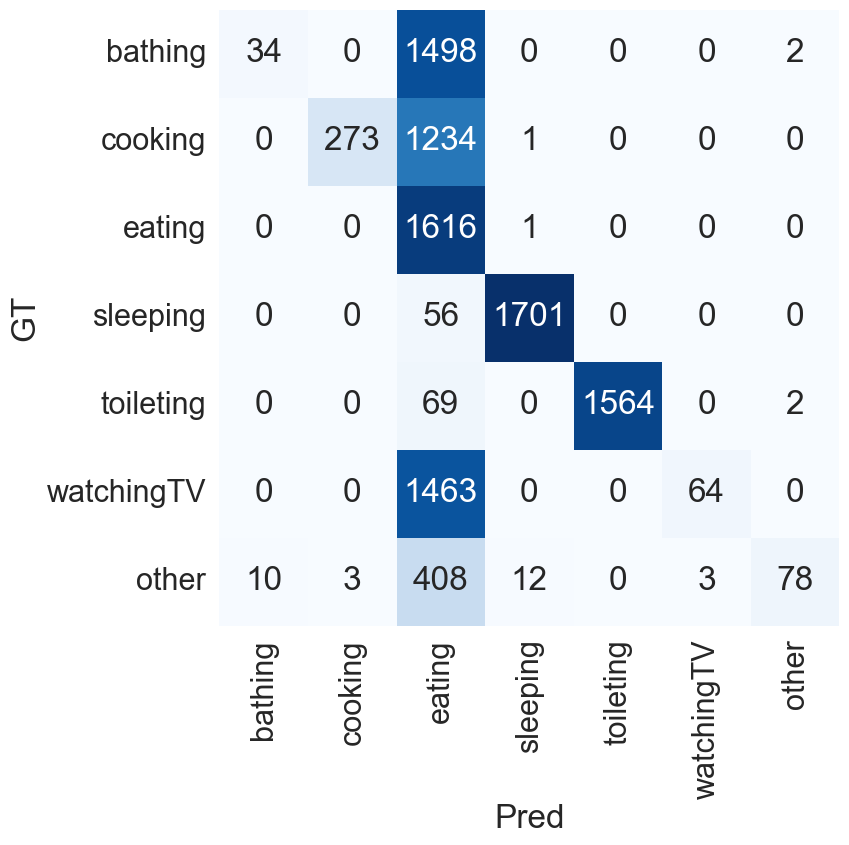

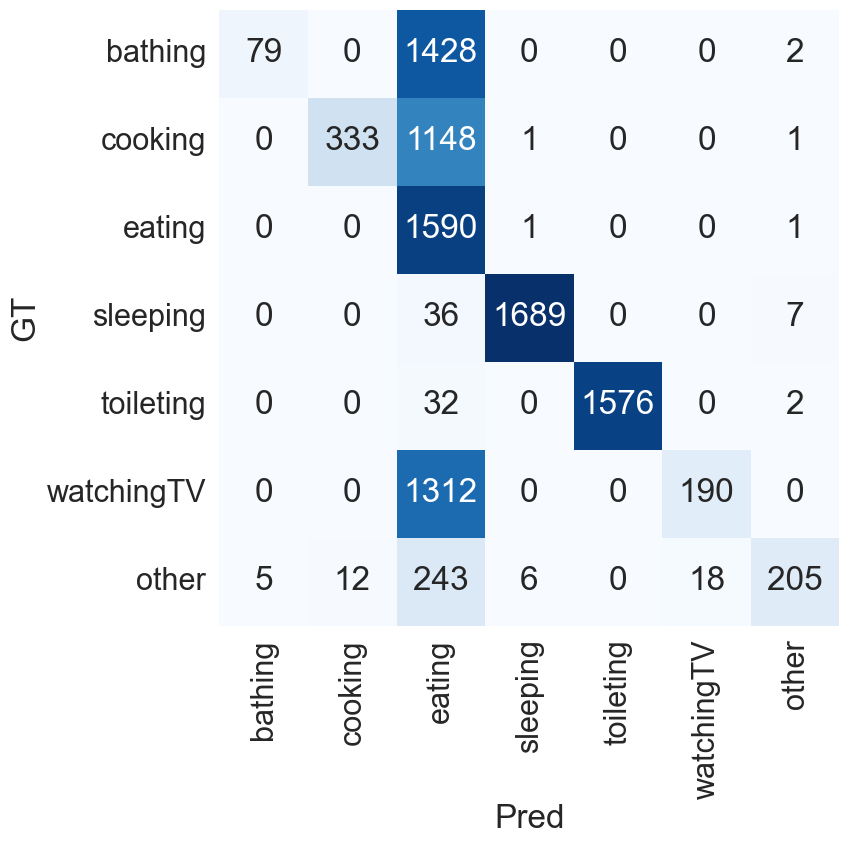

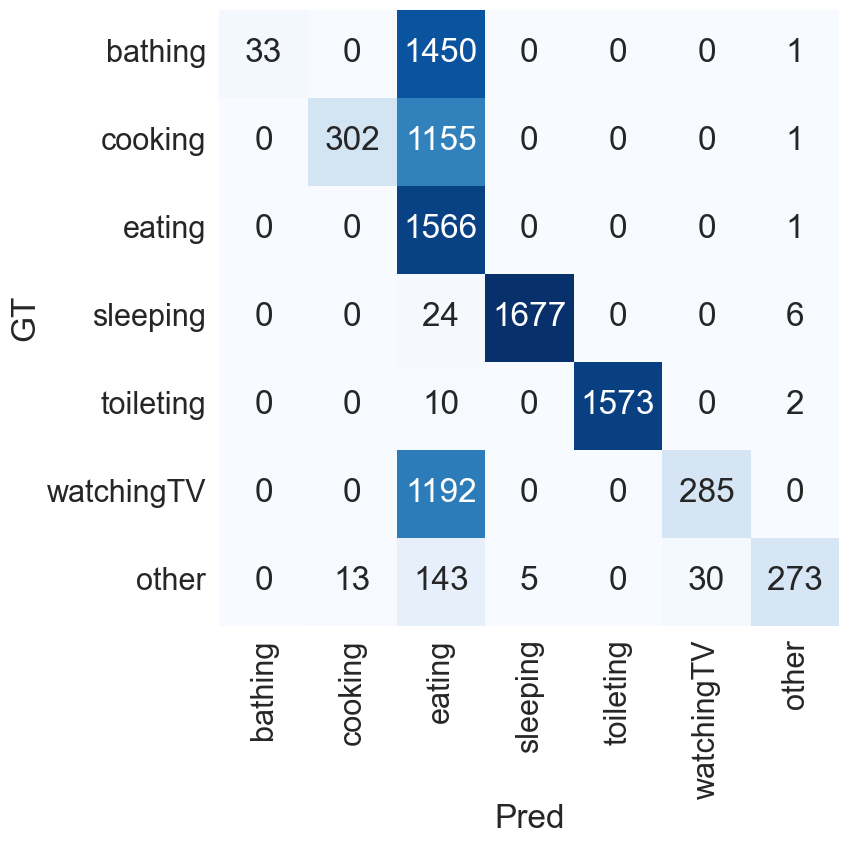

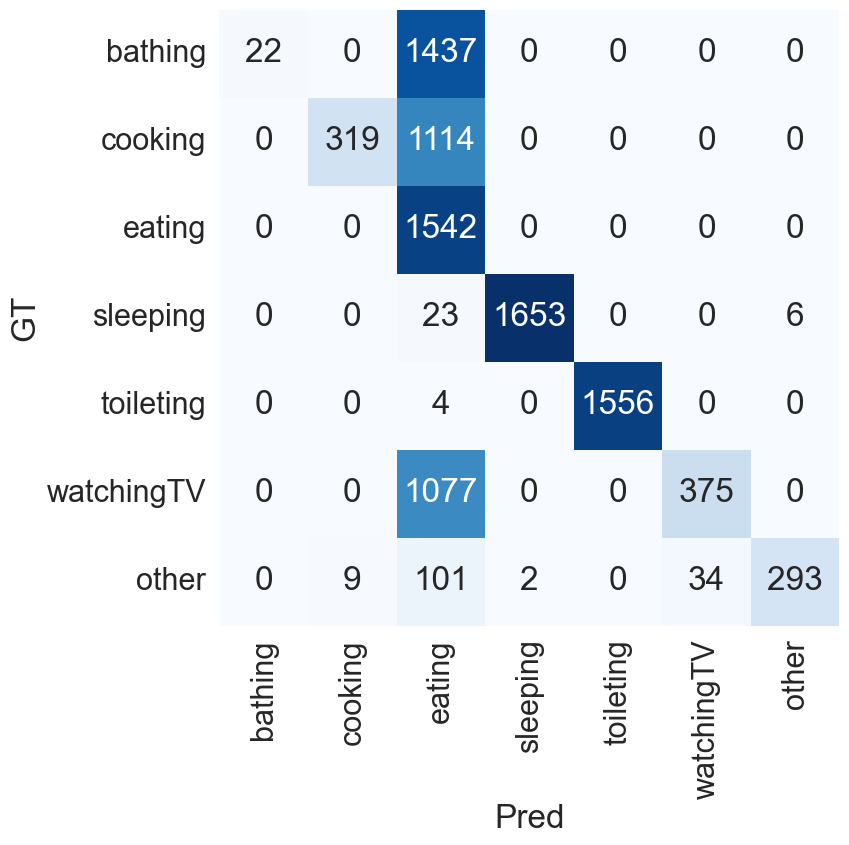

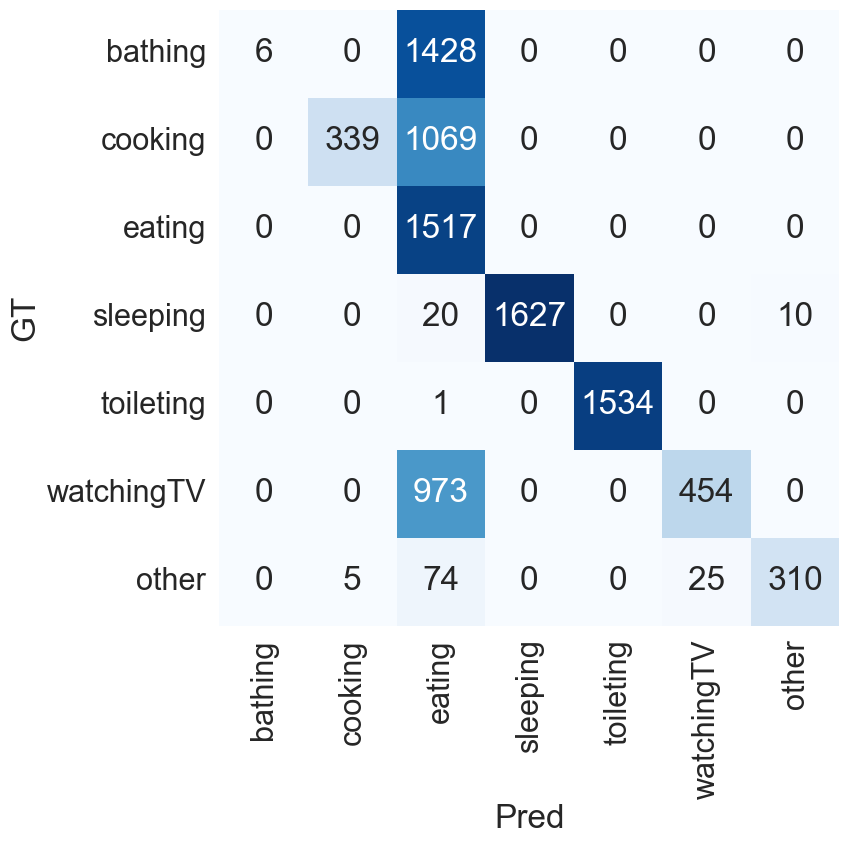

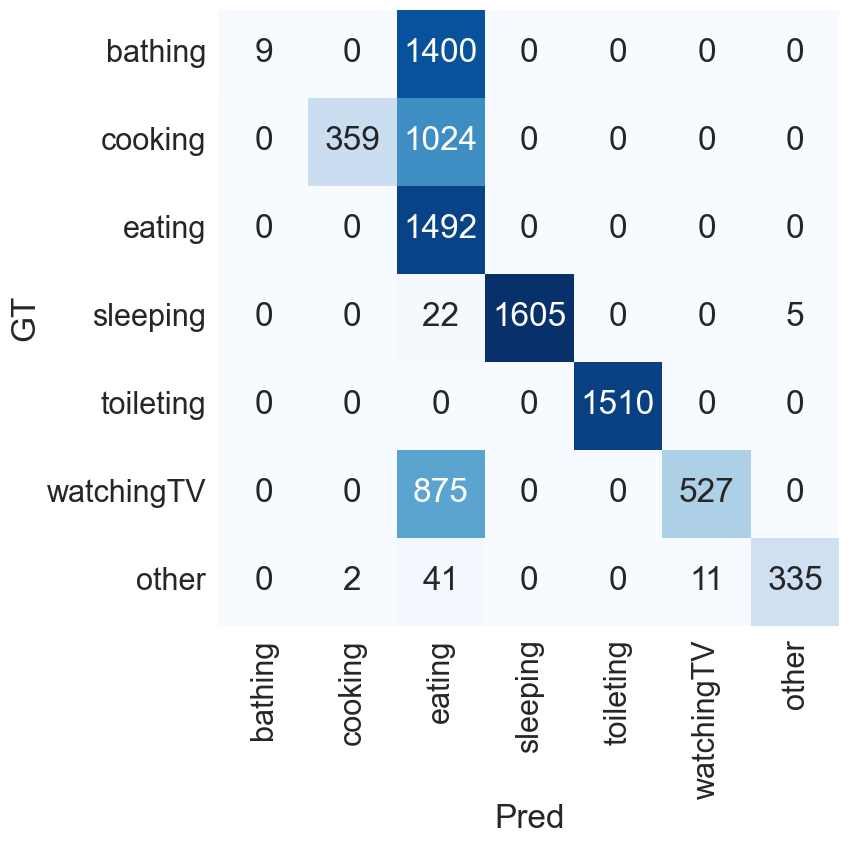

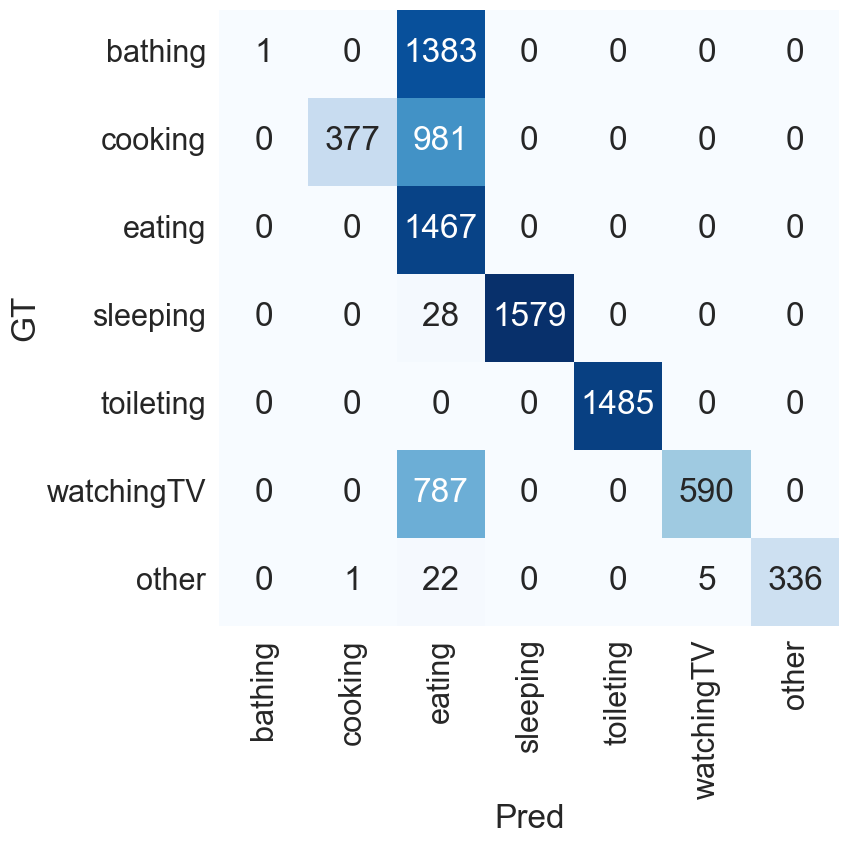

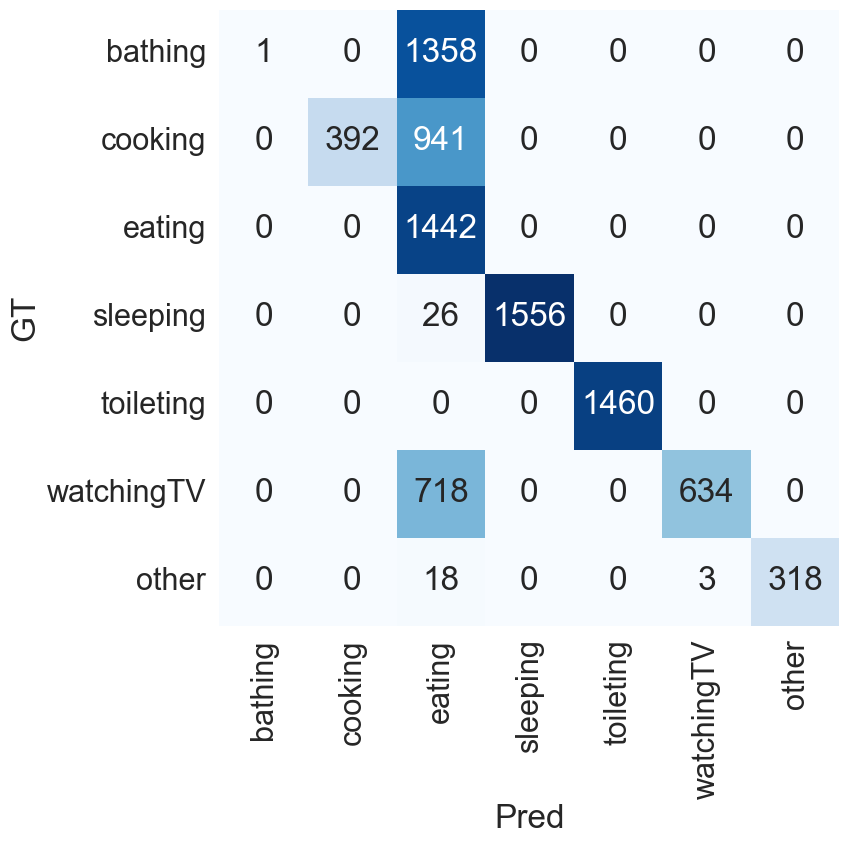

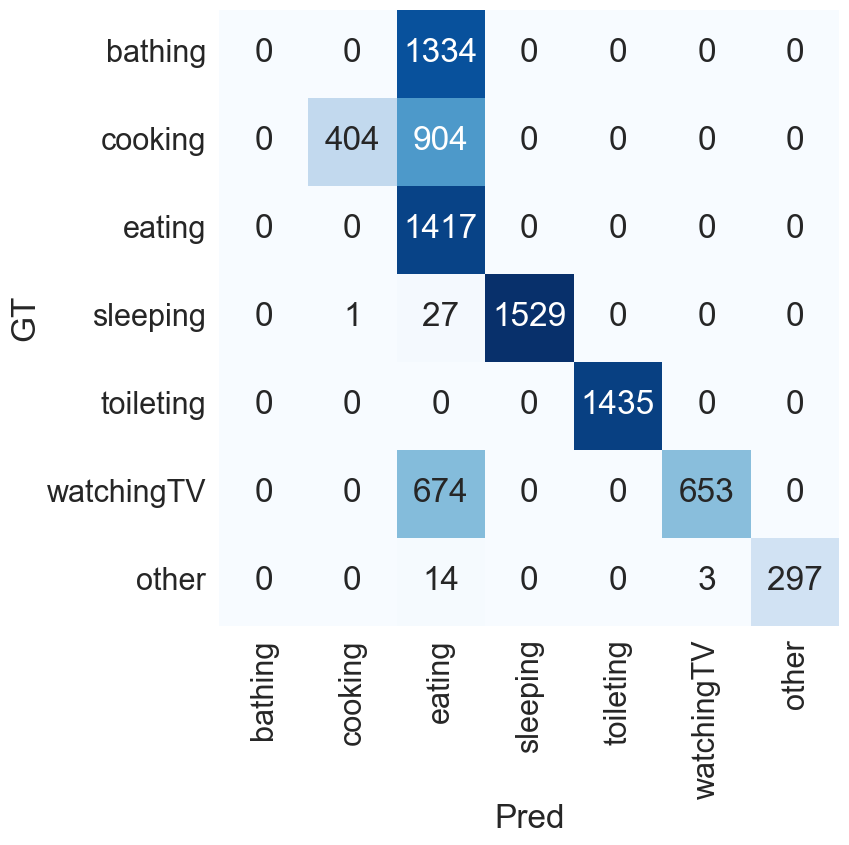

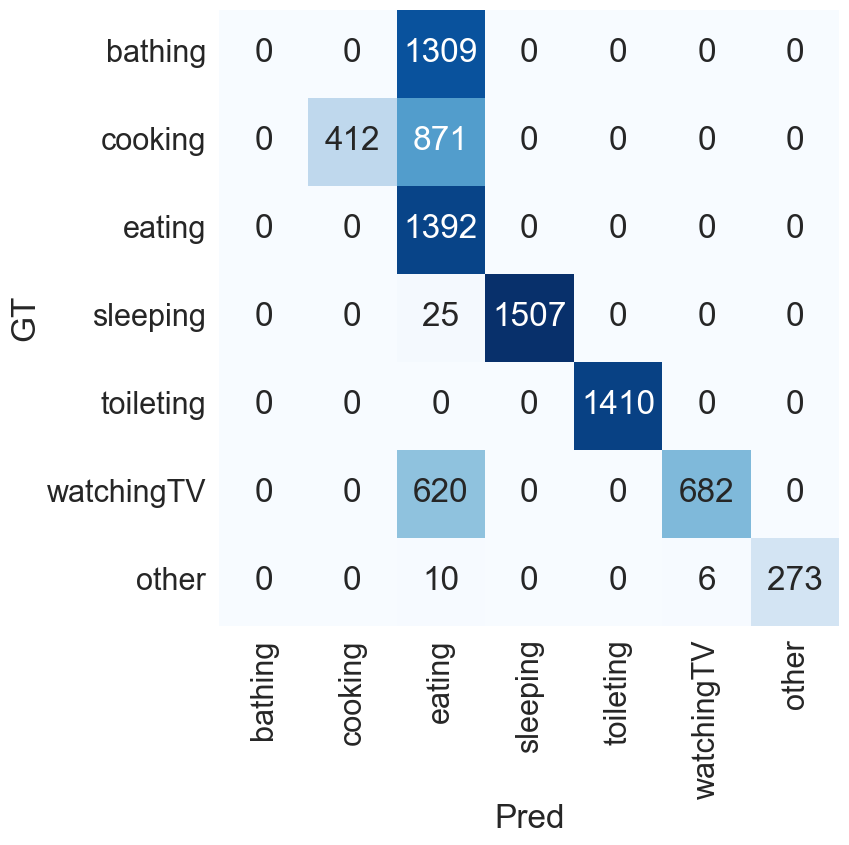

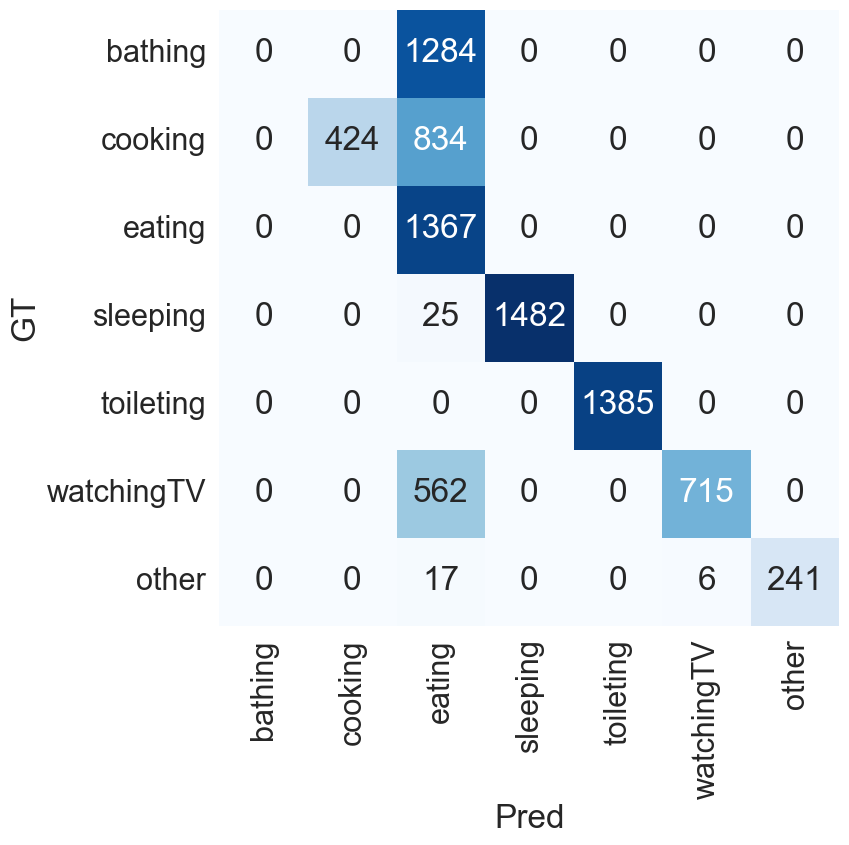

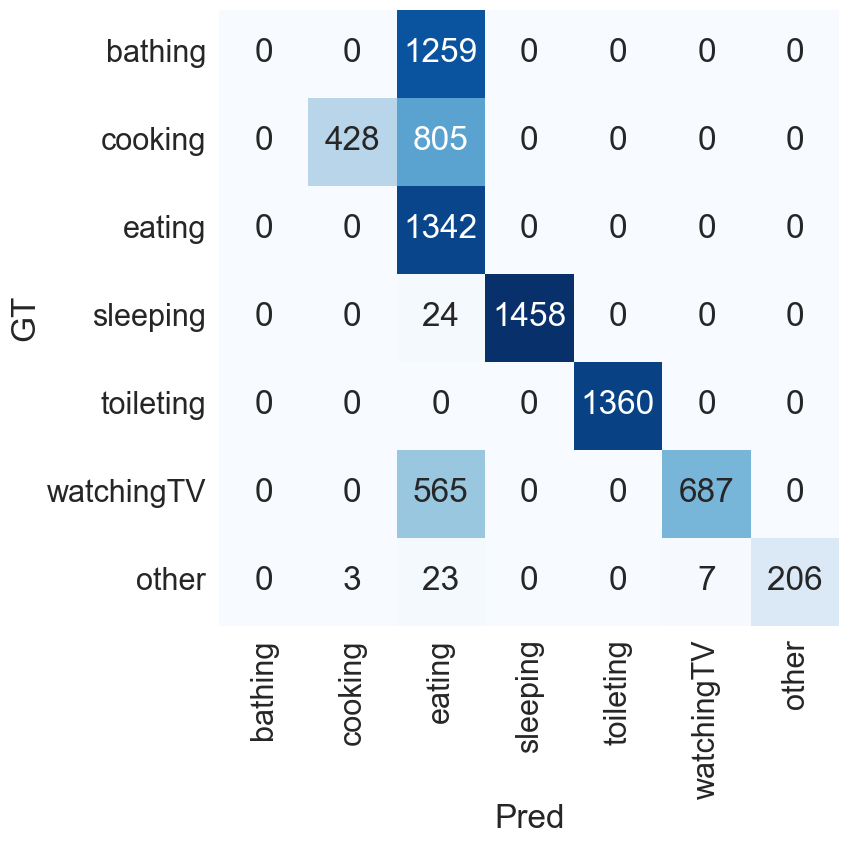

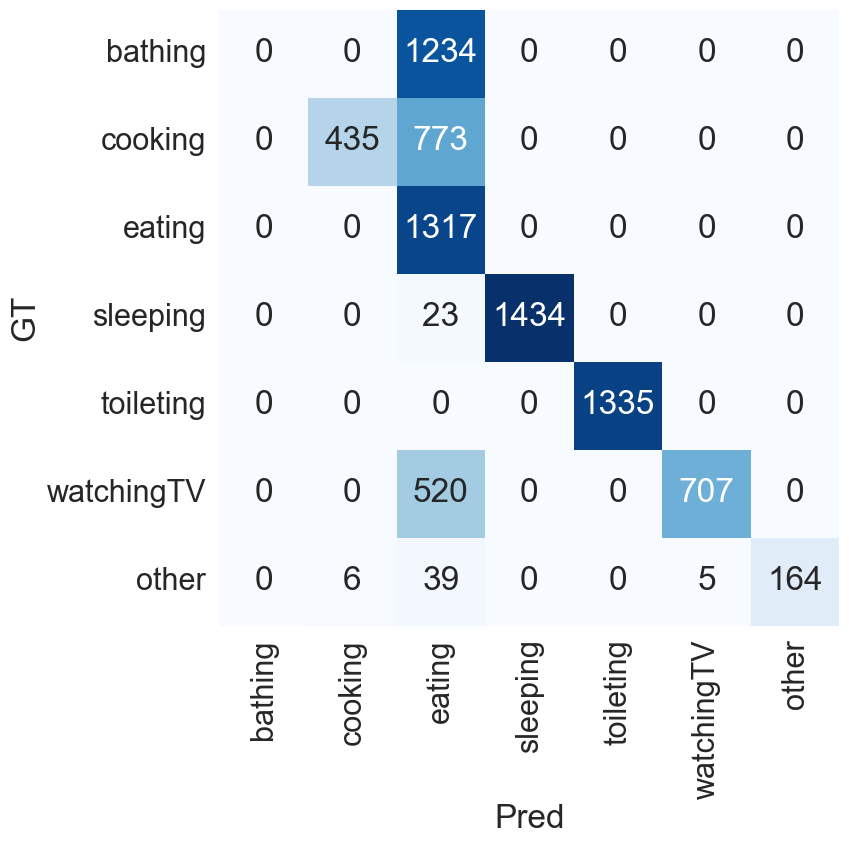

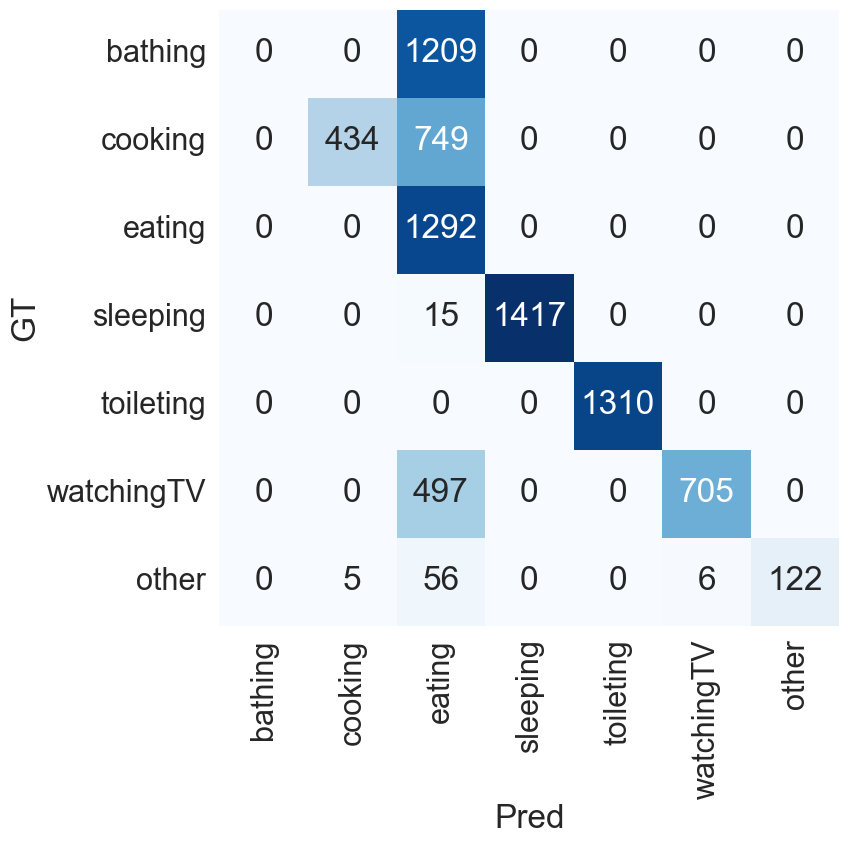

In [44]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sessions = ["session1","session2","session3","session4","session5"]
windows = [i for i in range(1,70,5)]
labels = ["bathing","cooking","eating","sleeping","toileting","watchingTV","other"]
try:
    os.mkdir("./output")
except:
    pass

result = []
for window in windows:
    session_acc = []
    session_fscore = []

    session_pred = []
    session_test = []
    for session in sessions:
        X_train = []
        y_train = []
        X_test = []
        y_test = []

        cm = 0
        for target in sessions:
            if session == target:
                #print("./binary_data/" + target + ".csv")
                df = pd.read_csv("./binary_data/" + target + ".csv")
                for col, split_df in df.groupby("activity"):
                    #print(split_df)
                    tmp_df = split_df[["ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12"]]
                    for i in range(0,len(tmp_df)-window):
                        data = list(np.ravel(tmp_df.iloc[i:i+window].values))
                        label = split_df.iloc[i][-1]
                        X_test.append(data)
                        y_test.append(label)
            else:
                df = pd.read_csv("./binary_data/" + target + ".csv")
                for col, split_df in df.groupby("activity"):
                    #print(split_df)
                    tmp_df = split_df[["ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12"]]
                    for i in range(0,len(tmp_df)-window):
                        data = list(np.ravel(tmp_df.iloc[i:i+window].values))
                        label = split_df.iloc[i][-1]
                        X_train.append(data)
                        y_train.append(label)
        #機械学習
        #Random Forest
        clf_rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
        clf_rf.fit(X_train, y_train)
        clf_rf_pred = clf_rf.predict(X_test)
        rf_acc = accuracy_score(y_test, clf_rf_pred)
        rf_fscore = f1_score(y_test, clf_rf_pred,average="weighted")

        #print(len(clf_rf_pred),len(y_test))

        session_pred += list(clf_rf_pred)
        session_test += y_test

        session_acc.append(rf_acc)
        session_fscore.append(rf_fscore)

        #SVM
        # clf_svm = SVC(kernel='linear', random_state=None)
        # clf_svm.fit(X_train, y_train)
        # clf_svm_pred = clf_svm.predict(X_test)
        # svm_acc = accuracy_score(y_test, clf_svm_pred)
        # svm_fscore = f1_score(y_test, clf_svm_pred,average="weighted")
    ses_ave_acc = round(sum(session_acc)/len(session_acc),4)
    ses_ave_fscore = round(sum(session_fscore)/len(session_fscore),4)
    result.append([window,ses_ave_acc,ses_ave_fscore])

    #混同行列
    cm = confusion_matrix(session_test,session_pred, labels = labels)
    cm = pd.DataFrame(data=cm,columns = labels, index=labels)
    plt.figure(figsize=(8,8))
    sns.set(font_scale = 2)
    sns.heatmap(cm, annot=True, cmap='Blues',fmt="d",cbar=False)
    plt.xlabel("Pred")
    plt.ylabel("GT")
    plt.savefig("./output/" + str(window) + "_conf.png")

    print([window,ses_ave_acc,ses_ave_fscore])

In [11]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sessions = ["session1","session2","session3","session4","session5"]
windows = [i for i in range(1,70,5)]
trans_effects = [0.1,0.5,0.9,0.99,0.999]

result = []
for trans_effect in trans_effects:
    for session in sessions:
        df = pd.read_csv("./binary_data/" + session+ ".csv")
        for col in df:
            tmp = []
            if col != "activity":
                for i in range(1,len(df[col])+1):
                    if df[col][i-1] == 1:
                        tmp.append(1)
                    else:
                        if len(tmp) == 0:
                            tmp.append(0)
                        else:
                            tmp.append(round(tmp[-1]*trans_effect,5))
                df[col] = tmp
        try:
            os.mkdir("./transitional_effect_data/" + str(trans_effect))
        except:
            pass
        df.to_csv("./transitional_effect_data/" + str(trans_effect) + "/" + session + ".csv")
            

<Axes: >

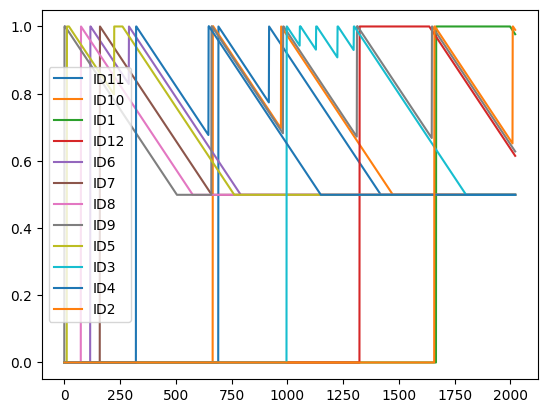

In [9]:
df.plot()

------ 0.1 -------
[1, 0.5313, 0.4733]
[6, 0.5746, 0.5358]
[11, 0.5902, 0.5505]
[16, 0.6059, 0.5693]
[21, 0.6191, 0.5823]
[26, 0.6372, 0.6037]
[31, 0.6495, 0.6156]
[36, 0.6607, 0.6278]
[41, 0.6655, 0.6332]
[46, 0.6751, 0.6422]
[51, 0.6808, 0.6481]
[56, 0.6812, 0.6487]
[61, 0.6853, 0.6528]
[66, 0.6841, 0.6514]
------ 0.5 -------
[1, 0.5313, 0.4733]
[6, 0.5746, 0.5358]
[11, 0.5902, 0.5505]
[16, 0.6059, 0.5693]
[21, 0.6191, 0.5823]
[26, 0.6372, 0.6037]


KeyboardInterrupt: 

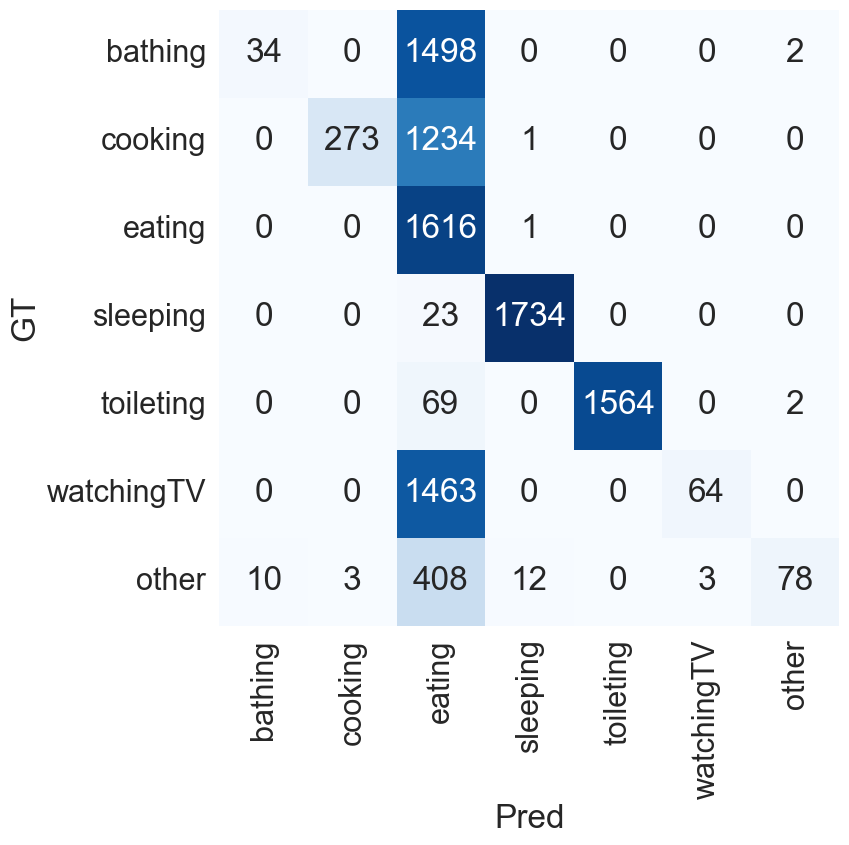

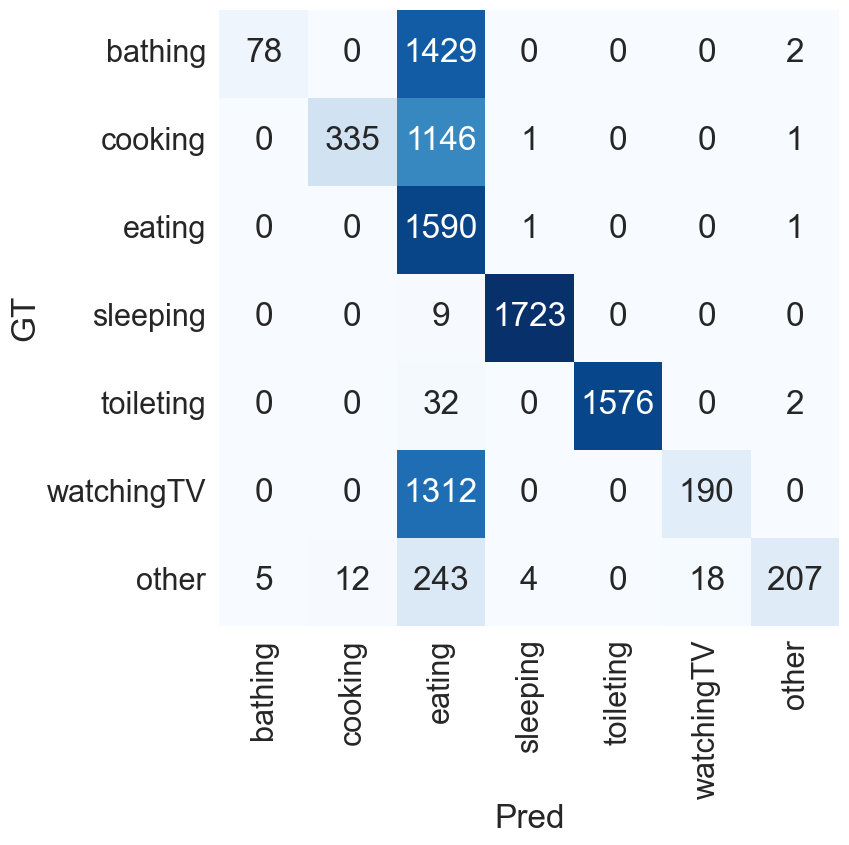

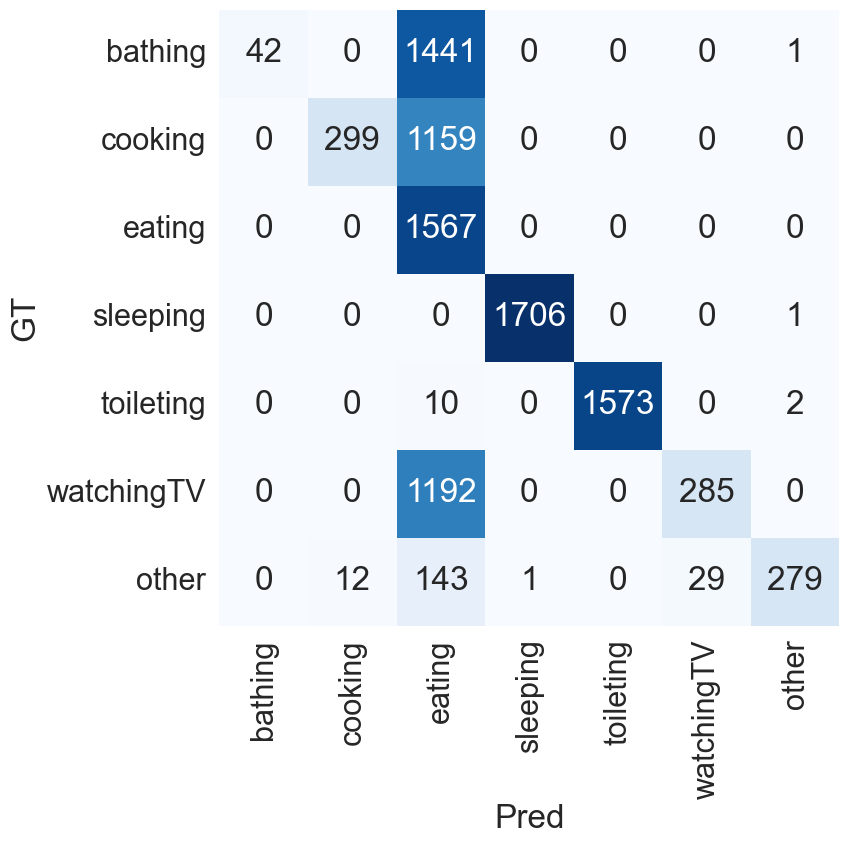

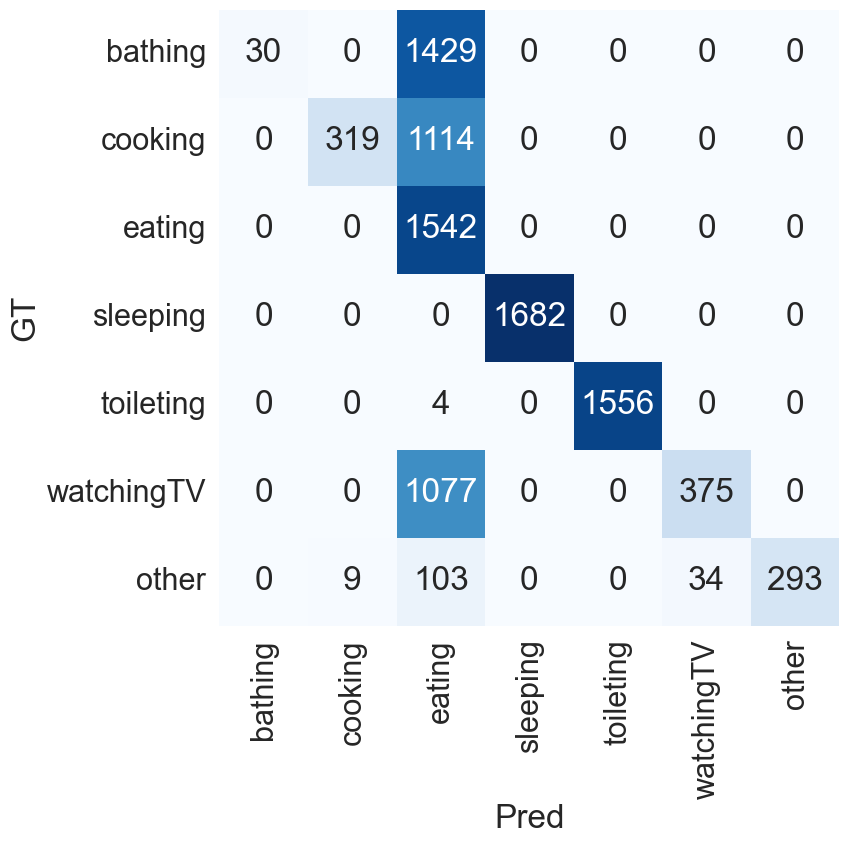

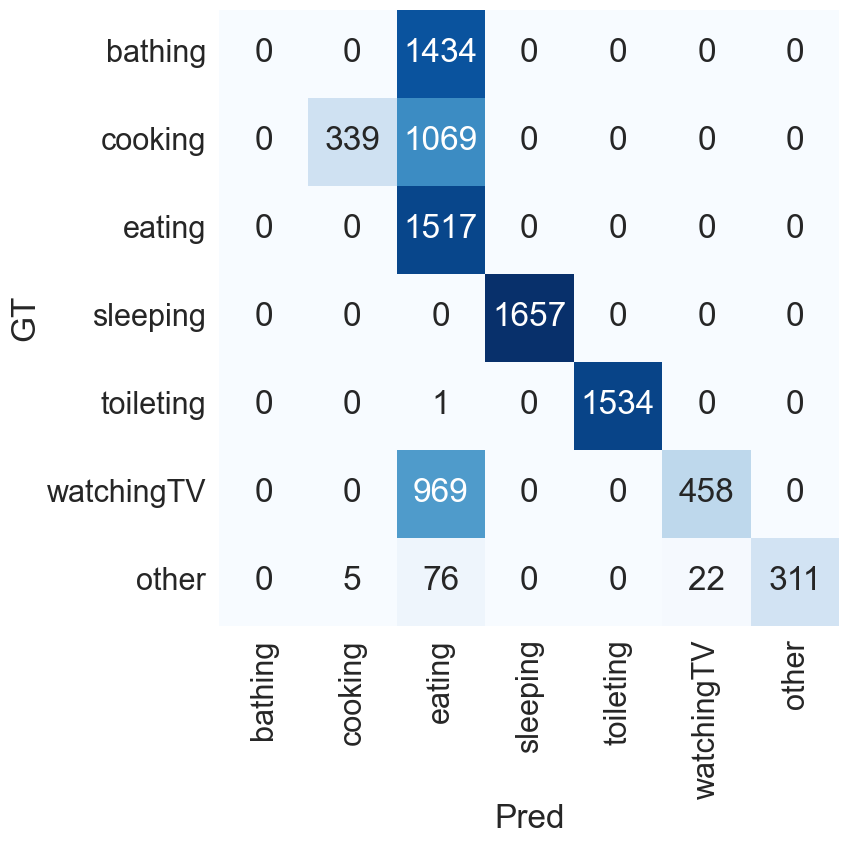

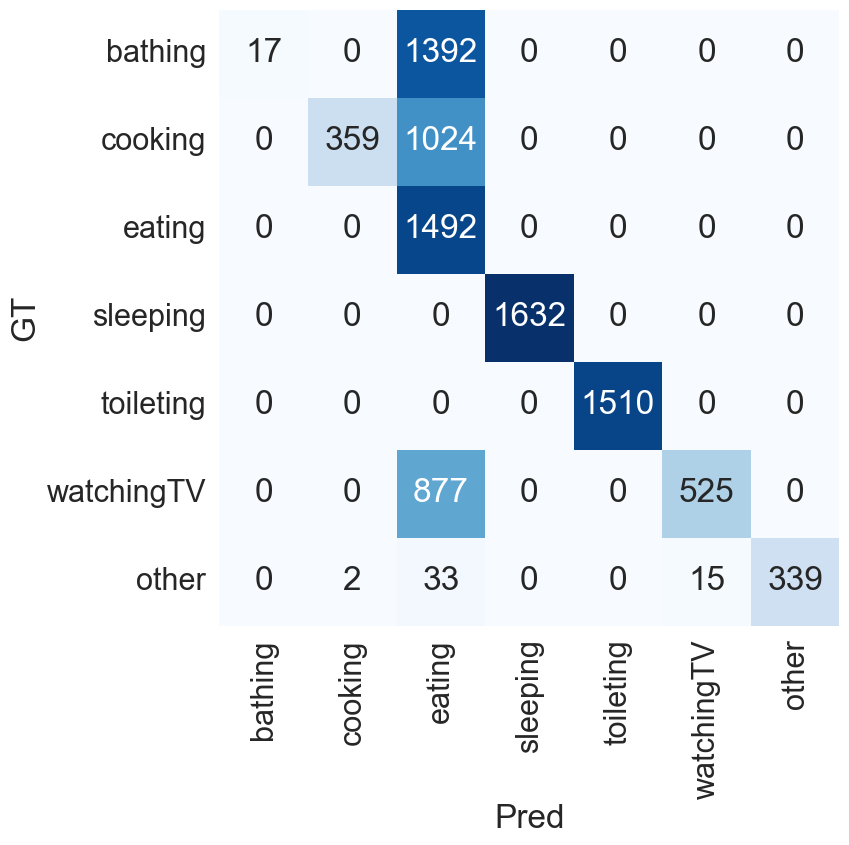

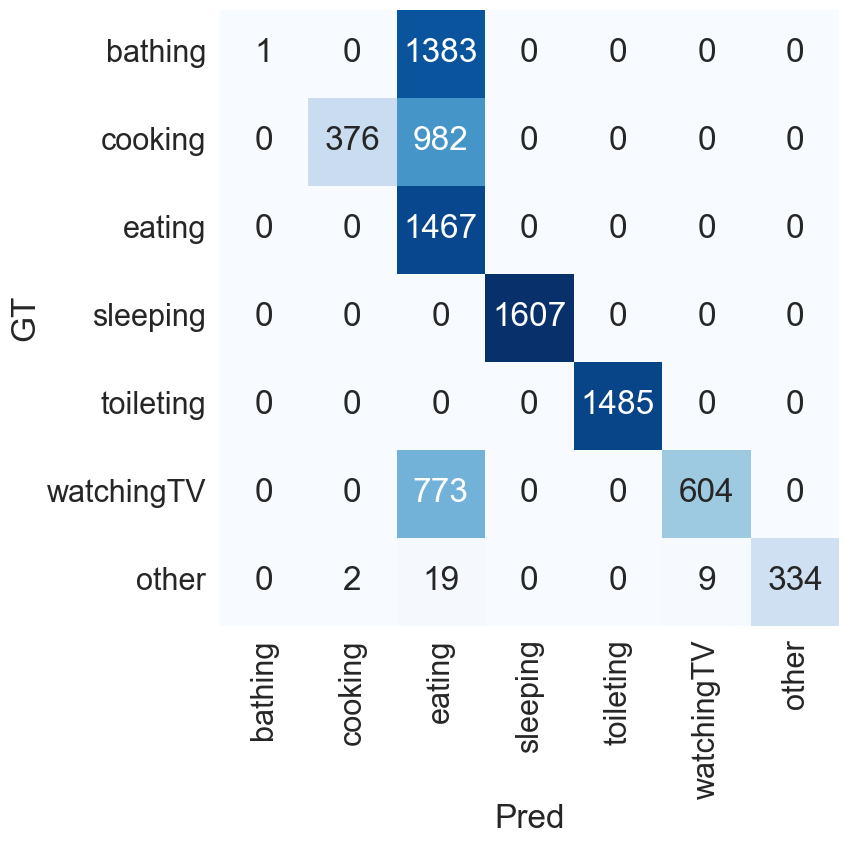

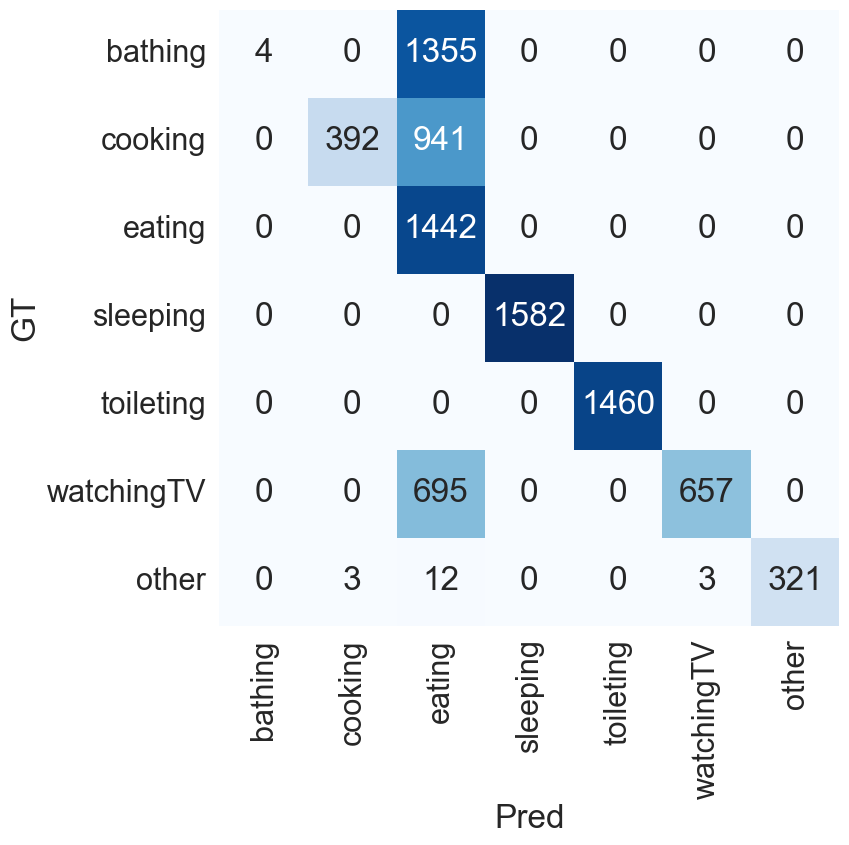

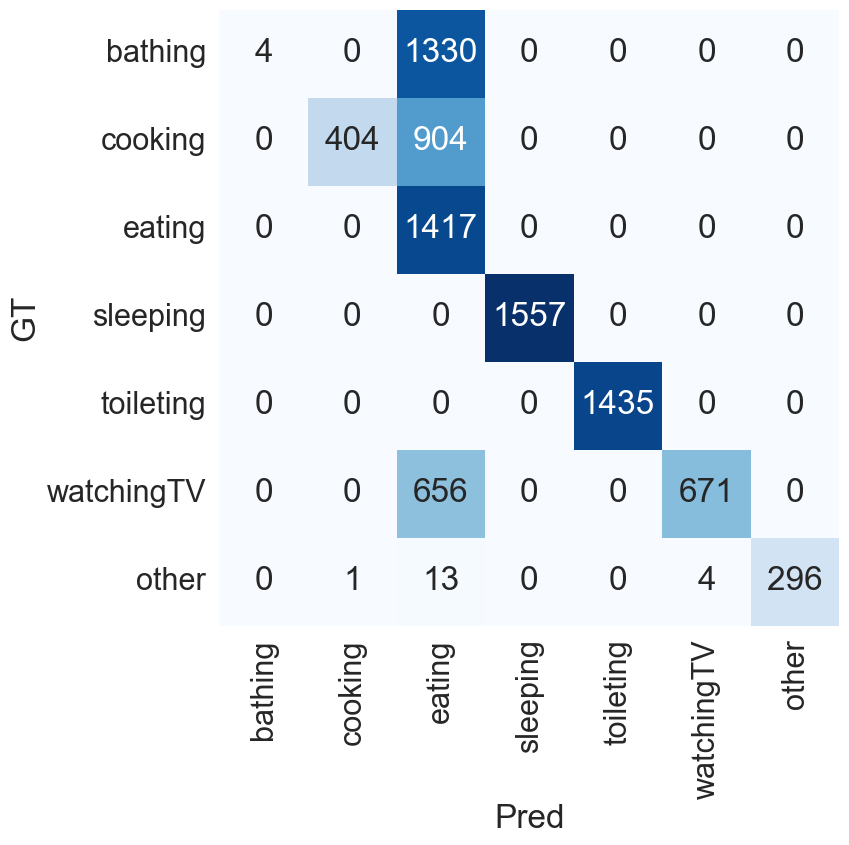

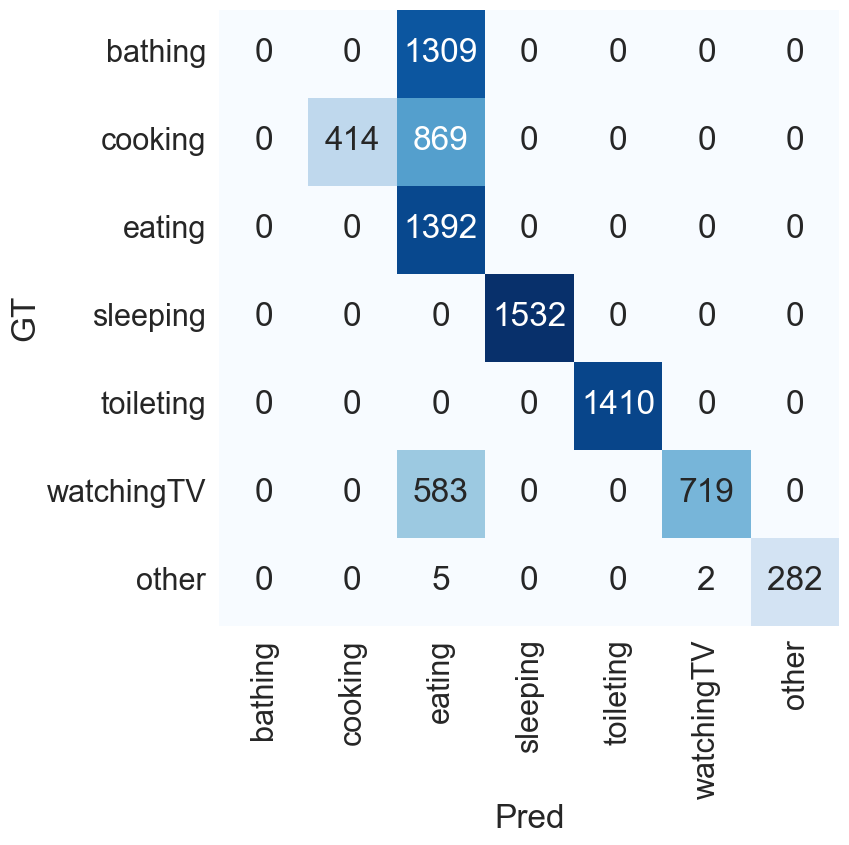

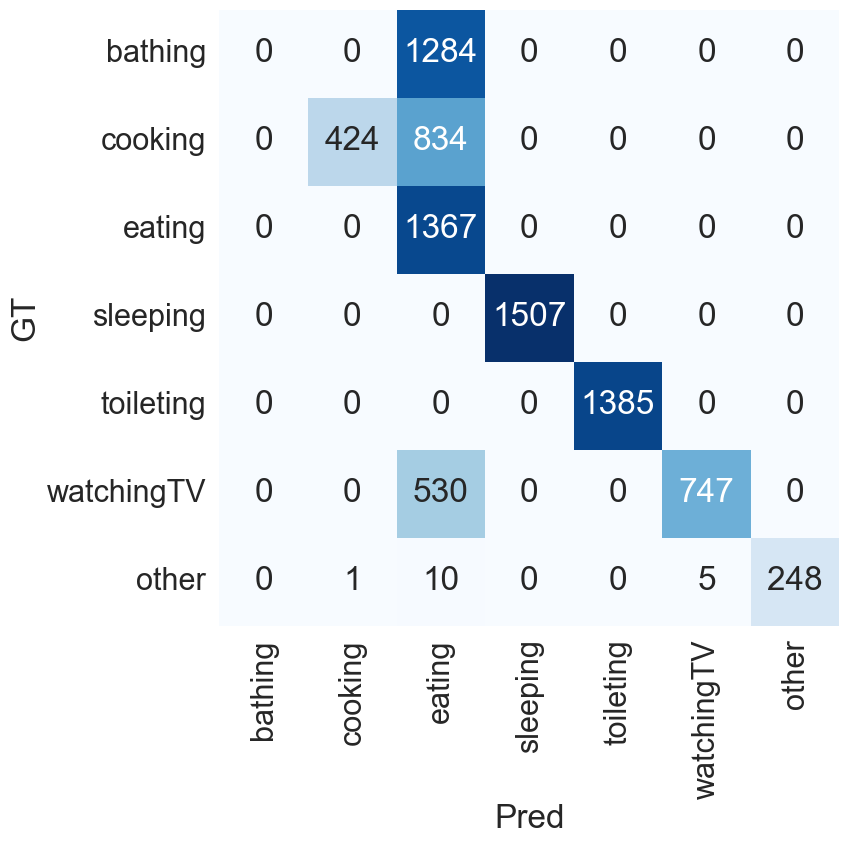

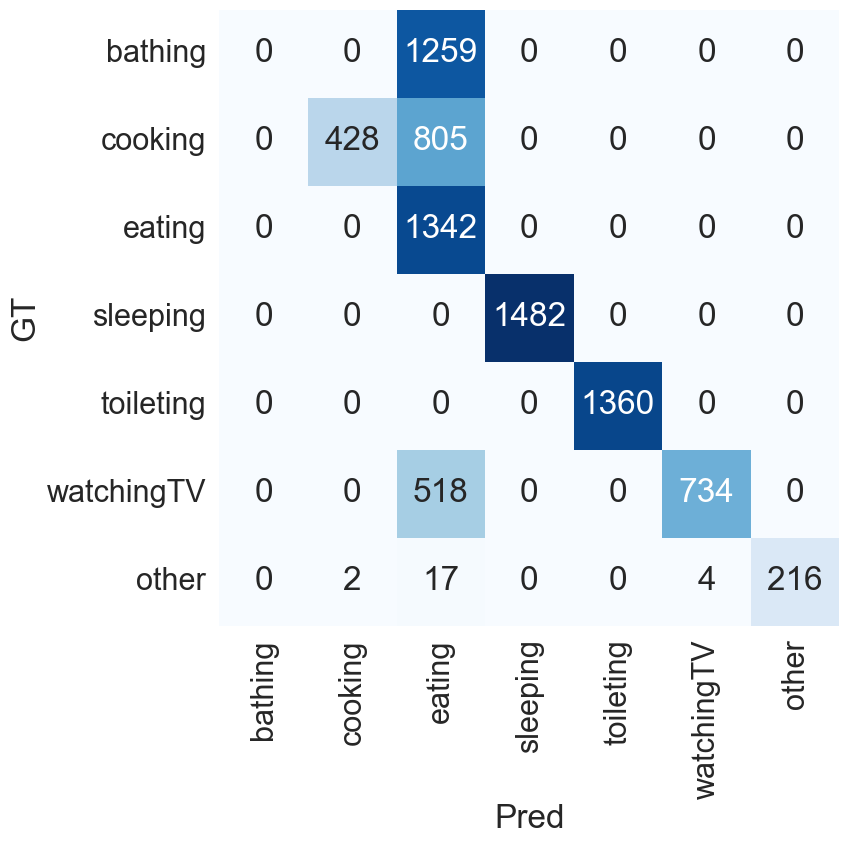

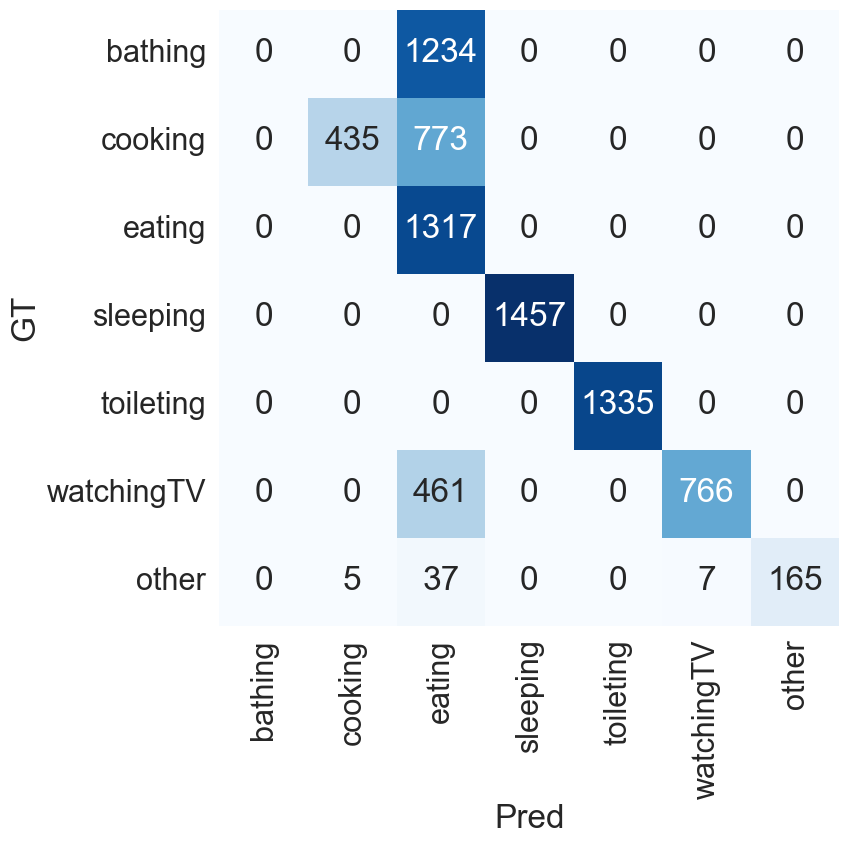

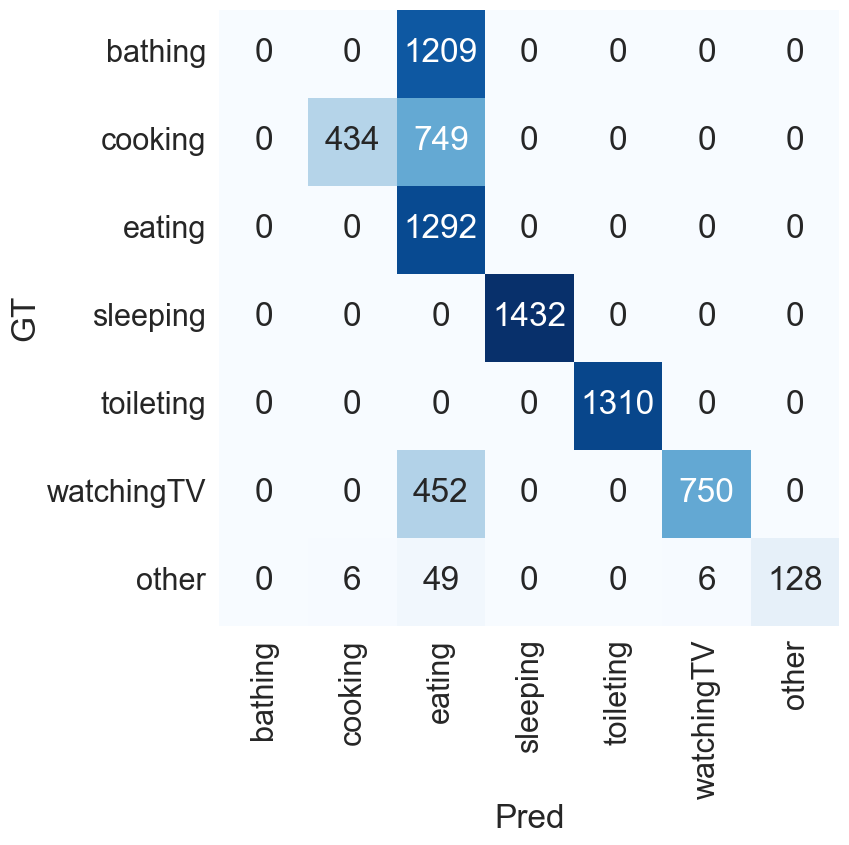

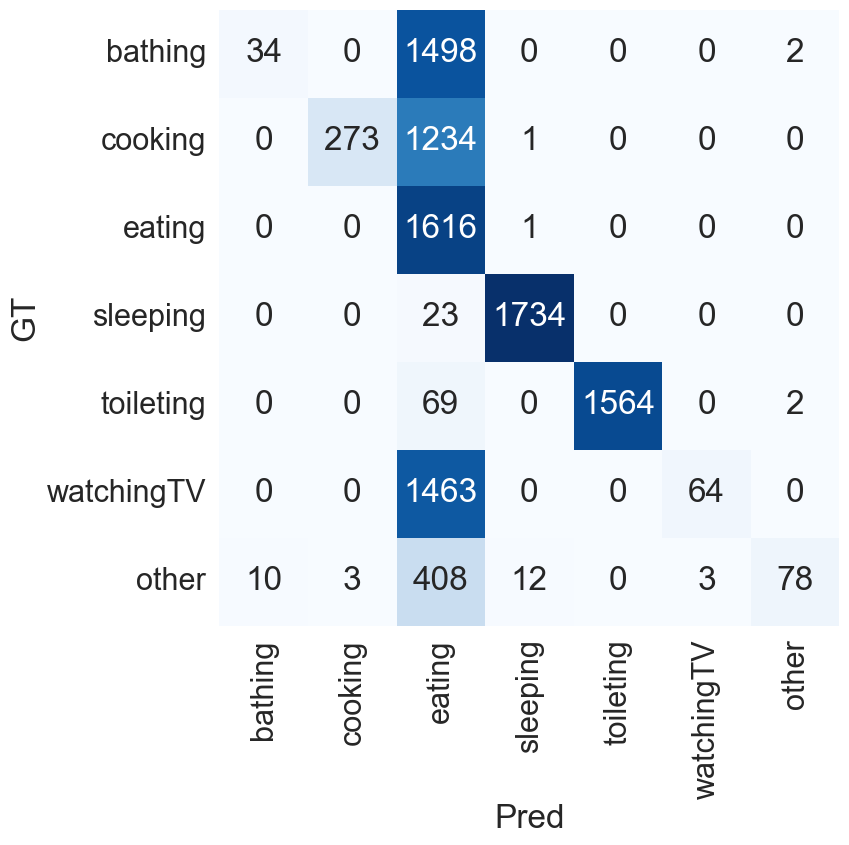

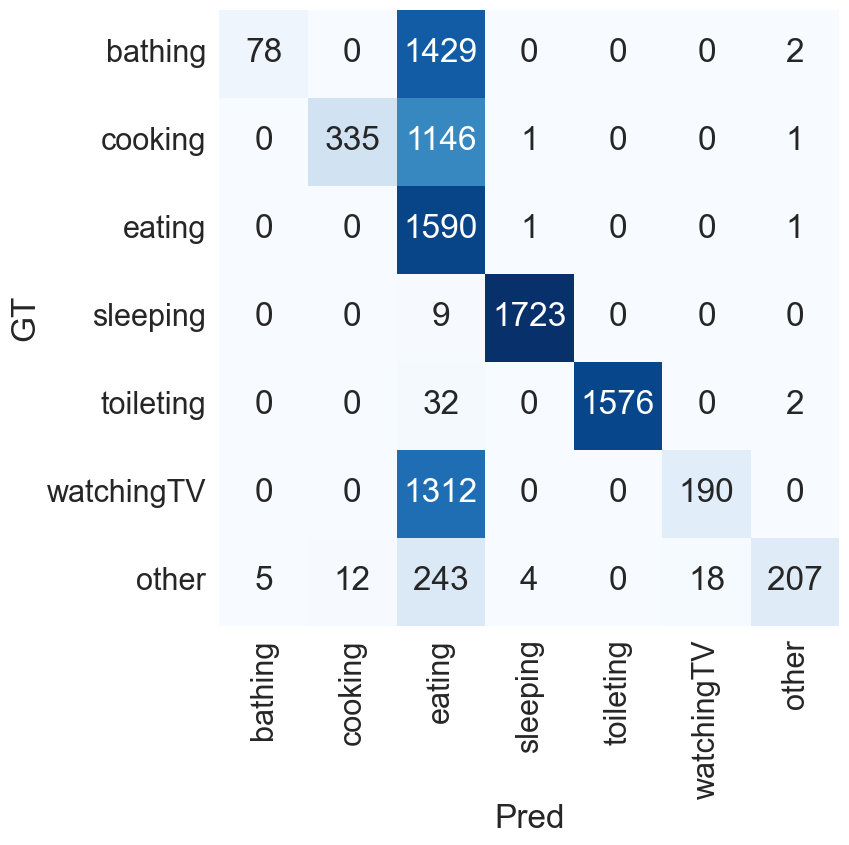

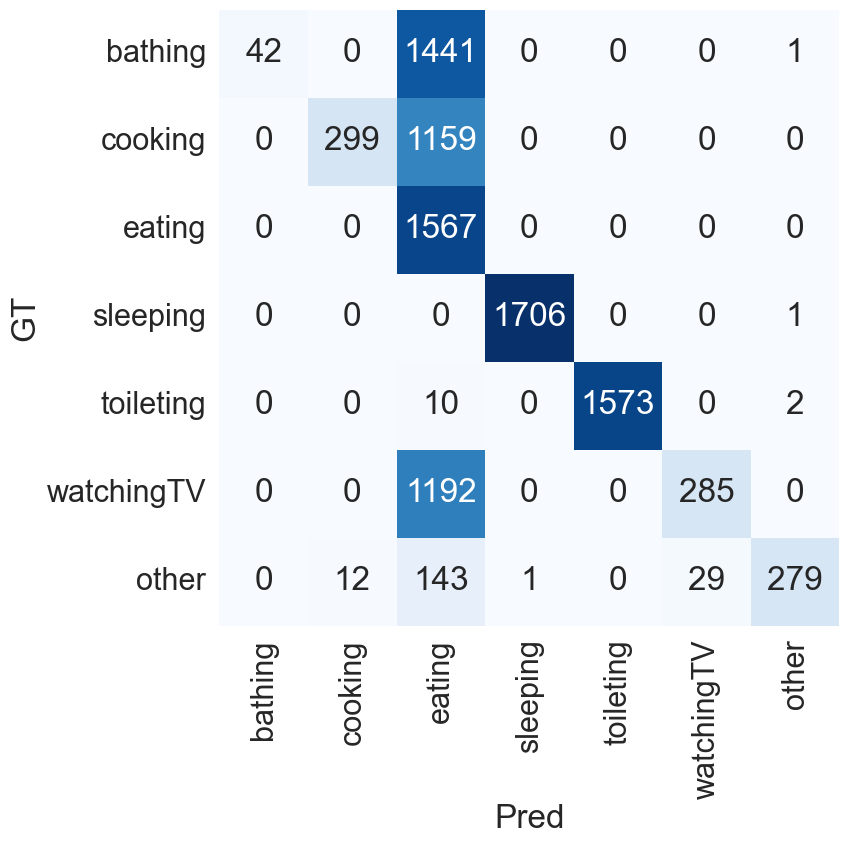

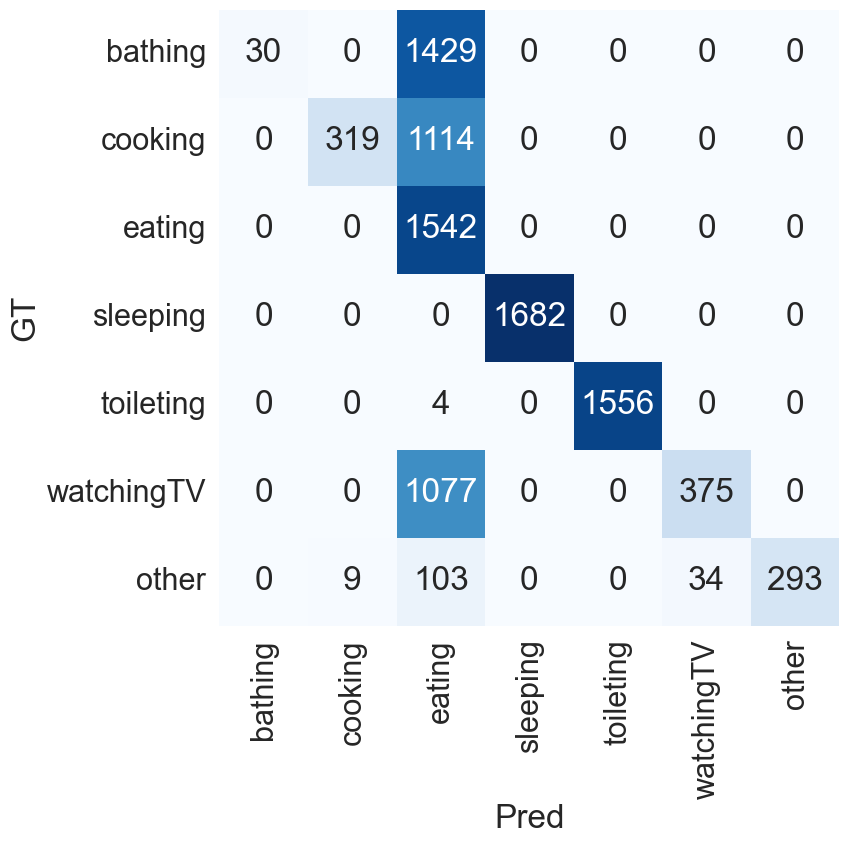

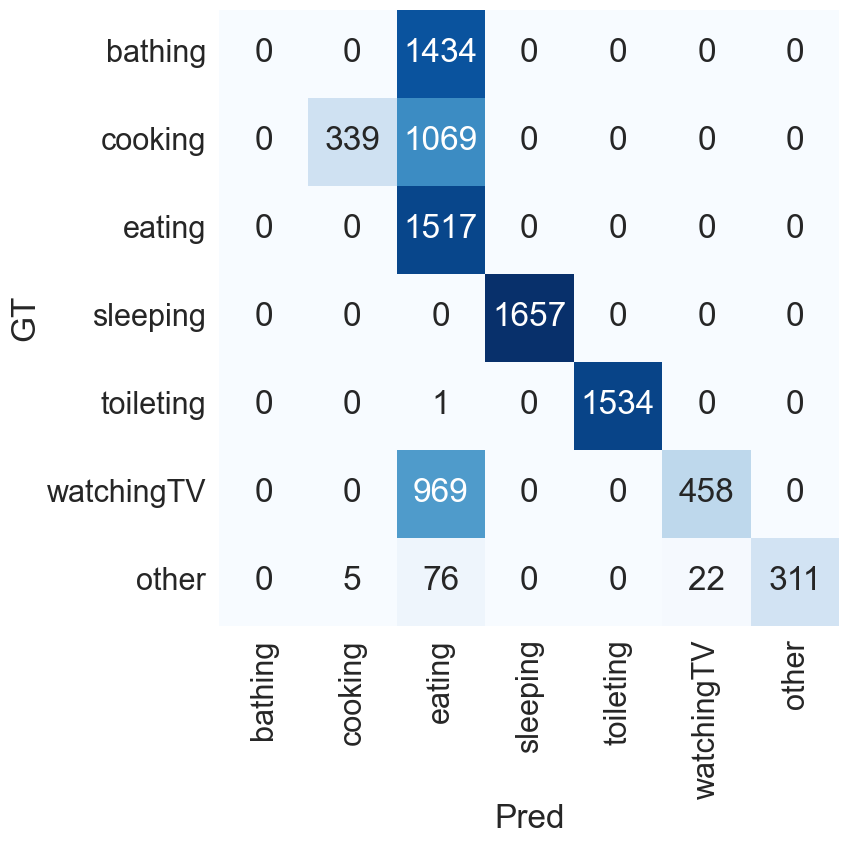

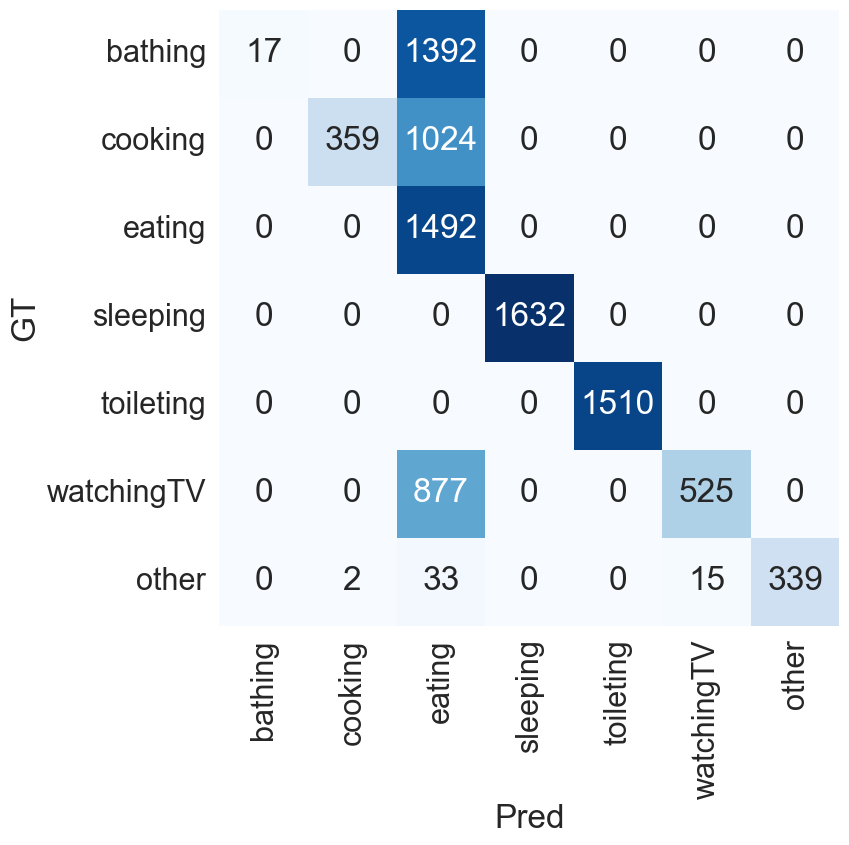

In [13]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sessions = ["session1","session2","session3","session4","session5"]
windows = [i for i in range(1,70,5)]
labels = ["bathing","cooking","eating","sleeping","toileting","watchingTV","other"]
trans_effects = [0.1,0.5,0.9,0.99,0.999]
try:
    os.mkdir("./output2")
except:
    pass

result = []

for trans_effect in trans_effects:
    print("------",trans_effect,"-------")    
    for window in windows:
        session_acc = []
        session_fscore = []

        session_pred = []
        session_test = []
        for session in sessions:
            X_train = []
            y_train = []
            X_test = []
            y_test = []

            cm = 0
            for target in sessions:
                if session == target:
                    #print("./binary_data/" + target + ".csv")
                    df = pd.read_csv("./binary_data/" + target + ".csv")
                    for col, split_df in df.groupby("activity"):
                        #print(split_df)
                        tmp_df = split_df[["ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12"]]
                        for i in range(0,len(tmp_df)-window):
                            data = list(np.ravel(tmp_df.iloc[i:i+window].values))
                            label = split_df.iloc[i][-1]
                            X_test.append(data)
                            y_test.append(label)
                else:
                    df = pd.read_csv("./binary_data/" + target + ".csv")
                    for col, split_df in df.groupby("activity"):
                        #print(split_df)
                        tmp_df = split_df[["ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12"]]
                        for i in range(0,len(tmp_df)-window):
                            data = list(np.ravel(tmp_df.iloc[i:i+window].values))
                            label = split_df.iloc[i][-1]
                            X_train.append(data)
                            y_train.append(label)
            #機械学習
            #Random Forest
            clf_rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
            clf_rf.fit(X_train, y_train)
            clf_rf_pred = clf_rf.predict(X_test)
            rf_acc = accuracy_score(y_test, clf_rf_pred)
            rf_fscore = f1_score(y_test, clf_rf_pred,average="weighted")

            #print(len(clf_rf_pred),len(y_test))

            session_pred += list(clf_rf_pred)
            session_test += y_test

            session_acc.append(rf_acc)
            session_fscore.append(rf_fscore)

            #SVM
            # clf_svm = SVC(kernel='linear', random_state=None)
            # clf_svm.fit(X_train, y_train)
            # clf_svm_pred = clf_svm.predict(X_test)
            # svm_acc = accuracy_score(y_test, clf_svm_pred)
            # svm_fscore = f1_score(y_test, clf_svm_pred,average="weighted")
        ses_ave_acc = round(sum(session_acc)/len(session_acc),4)
        ses_ave_fscore = round(sum(session_fscore)/len(session_fscore),4)
        result.append([window,ses_ave_acc,ses_ave_fscore])

        #混同行列
        cm = confusion_matrix(session_test,session_pred, labels = labels)
        cm = pd.DataFrame(data=cm,columns = labels, index=labels)
        plt.figure(figsize=(8,8))
        sns.set(font_scale = 2)
        sns.heatmap(cm, annot=True, cmap='Blues',fmt="d",cbar=False)
        plt.xlabel("Pred")
        plt.ylabel("GT")

        try:
            os.mkdir("./output2/" + str(trans_effect))
        except:
            pass

        plt.savefig("./output2/" + str(trans_effect) + "/" + str(window) + "_conf.png")

        print([window,ses_ave_acc,ses_ave_fscore])